In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Load previously cleaned csv file
# Output column is the output based on previously created buckets
df = pd.read_csv(r'C:\Rohan\College\1st Year\Spring Quarter\Misc\Datathon\Datathon Dataset\Cleaned_Data.csv')

pd.set_option('display.max_columns', None)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,discharge_disposition_description,admission_type_description,output
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,>30,Discharged to home,Emergency,1
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Emergency,0
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,NO,Discharged to home,Emergency,0
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,Steady,No,No,No,No,Steady,No,Ch,Yes,NO,Discharged to home,Emergency,0
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,Yes,>30,Discharged to home,Urgent,1


In [308]:
# Bucket cleaned diagnosis data based on IC9 code buckets
import csv

# Create array for mapping
bucketMapping = []
with open(r'./cleaning/IC9ToCodes.csv') as csvFile:
    csvReader = csv.reader(csvFile, delimiter = ',')
    lineCount = 0

    for row in csvReader:
        bucketMapping.append([int(row[0]), int(row[1])])

# Create new cols and append them
diagnoses = ['diag_1', 'diag_2', 'diag_3']
for eachDiag in diagnoses:
    newBuckets = []
    for diag in df[eachDiag].tolist():
        if diag[0] == "V" or diag[0] == 'v':
            newBuckets.append(19)
        elif diag[0] == "E" or diag[0] == 'e':
            newBuckets.append(18)
        else:
            added = False
            diag = float(diag)
            for i, bucket in enumerate(bucketMapping):
                if diag >= bucket[0] and diag <= bucket[1]:
                    newBuckets.append(i)
                    added = True
                    break
            
            if not added:
                newBuckets.append(20)

    dfForNewDiag = pd.DataFrame({eachDiag + '_new': newBuckets})
    df = pd.concat([df, dfForNewDiag], axis = 1)

df.head()
    


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,discharge_disposition_description,admission_type_description,output,diag_1_new,diag_2_new,diag_3_new
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,>30,Discharged to home,Emergency,1,2,2,2
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,Steady,No,No,No,No,No,No,No,Yes,NO,Discharged to home,Emergency,0,11,2,19
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,NO,Discharged to home,Emergency,0,0,2,7
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,Steady,No,No,No,No,Steady,No,Ch,Yes,NO,Discharged to home,Emergency,0,1,1,2
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,Yes,>30,Discharged to home,Urgent,1,7,7,2


In [309]:
# Speicfy numerical features for model
numericalFeatures = ['admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diag_1_new', 'diag_2_new', 'diag_3_new']
print(f'Numerical Features: {len(numericalFeatures)}')

Numerical Features: 13


In [310]:
# Specify categorical data for model
categoricalFeatures = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']
print(f'Categorical Features: {len(categoricalFeatures)}')

# Use one-hot encoding to turn categorical features into numerical ones
categoricalColsToConcat = pd.get_dummies(df[categoricalFeatures])
categoricalColsToConcat.head()

# Concatenate new columns
df = pd.concat([df, categoricalColsToConcat], axis = 1)
df.head()

# Get categorical features that need to be added
allConcatenatedCategoricalCols = list(categoricalColsToConcat.columns)
print(f'Num categorical features used: {len(allConcatenatedCategoricalCols)}')

Categorical Features: 18
Num categorical features used: 74


In [311]:
# Get final data
colsToUse = numericalFeatures + allConcatenatedCategoricalCols
dfData = df[colsToUse + ['output']]
dfData.head()

,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diag_1_new,diag_2_new,diag_3_new,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,output
0,1,7,3,59,0,18,0,0,0,9,2,2,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1
1,1,7,2,11,5,13,2,0,1,6,11,2,19,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
2,1,7,2,44,1,16,0,0,0,7,0,2,7,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
3,1,7,1,51,0,8,0,0,0,5,1,1,2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
4,2,2,3,31,6,16,0,0,0,9,7,7,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1


In [312]:
# Shuffle the data samples to introduce randomness
dfData = dfData.sample(n = len(dfData))
dfData = dfData.reset_index(drop = True)

# Isolate 20% of data as test data
dfTest = dfData.sample(frac = 0.2)

# Get training set
dfTrain = dfData.drop(dfTest.index)

In [313]:
# Get matrix X and output vector y for machine learning programs
xTrain = dfTrain[colsToUse].values
yTrain = dfTrain['output'].values

# Scale data to unit variance and mean
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xTrain)

# Save this scaler for test data
import pickle
scalerfile = 'scalerFile.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

# Load the scaler back up
scaler = pickle.load(open(scalerfile, 'rb'))

xTrainTF = scaler.transform(xTrain)

# Get and scale matrix X for predicting
xTest = dfTest[colsToUse].values
yTest = dfTest['output'].values

scaler.fit(xTest)
xTestTF = scaler.transform(xTest)

def printAccuracy(pred, actual):
    totalVals = len(pred)
    correct = 0
    for i, val in enumerate(pred):
        correct += 1 if val == actual[i] else 0

    print(f'Accuracy: {100 * correct / totalVals}')

In [314]:
from matplotlib import pyplot

def printTop5Features(model):
    # Get feature importane
    importance = model.feature_importances_

    dictOfFeat = dict({})
    # Create summary of feature importances
    for i, feat in enumerate(importance):
        dictOfFeat[-feat] = colsToUse[i]

    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

    top5 = dict({})
    ind = 0
    for i in sorted(dictOfFeat.keys()):
        if ind > 4:
            break

        top5[dictOfFeat[i]] = -i
        ind += 1

    print(top5)

In [315]:
# Using logistic regression to produce model
from sklearn.tree import DecisionTreeClassifier
#logReg = LogisticRegression(random_state = 124)
#logReg.fit(xTrainTF, yTrain)

tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(xTrainTF, yTrain)

DecisionTreeClassifier(max_depth=10)

In [316]:
# Get predictions on training and testing set for LR model
yTTrainPreds = tree.predict(xTrainTF)
yTTestPreds = tree.predict(xTestTF)

Accuracy: 43.75335120643432
Accuracy: 40.35612748765524


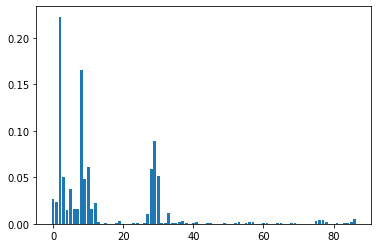

{'time_in_hospital': 0.22296806891676696, 'number_inpatient': 0.16516128063286642, 'age_[80-90)': 0.08884369669617205, 'diag_1_new': 0.06124646898551599, 'age_[70-80)': 0.05915179522224981}


In [317]:
# Print ac
printAccuracy(yTTrainPreds, yTrain)
printAccuracy(yTTestPreds, yTest)
printTop5Features(tree)

In [263]:
# Using k-nearest neighbors to produce model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(xTrainTF, yTrain)

KNeighborsClassifier(n_neighbors=100)

In [264]:
# Get predictions on training and testing set for knn
yTrainPreds = knn.predict(xTrainTF)
yTestPreds = knn.predict(xTestTF)

In [270]:
# Print the accuracy of the predictions from the training and testing set
printAccuracy(yTrainPreds, yTrain)
printAccuracy(yTestPreds, yTest)

Accuracy: 39.42515119396471
Accuracy: 37.75250635941942
